In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean, losses_val_mean = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=100,
    models_dir='./models',
    checkpoint_frequency=10,
    property='Cv',
    map_property=lambda t: get_property(t, "Cv"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>losses_train_mean</summary>
  [0.1602852847813963, 0.04488615383334753, 0.03141292810700357, 0.025042694300904788, 0.020690055929610495, 0.017423201087780046, 0.015017563710732233, 0.013313120387746489, 0.012091037208796031, 0.011136397090902951, 0.010249388067958354, 0.009630259453405428, 0.009122574089574375, 0.008613535649949794, 0.008172067423743016, 0.007733952214205039, 0.0073699412909844384, 0.006999541148749894, 0.006670165470509921, 0.006366601270888167, 0.0060673505537754925, 0.0058141726552157404, 0.005617105592328755, 0.005403739980929425, 0.005237634151677946, 0.005070654235417052, 0.004917407029164692, 0.00478551809849702, 0.004653077974213601, 0.004518776655391935, 0.004372774414705538, 0.004279262448908445, 0.004189240036548694, 0.0040989581460049605, 0.004015568523796211, 0.003941335727850735, 0.0038678179719284634, 0.003795536752618714, 0.003731083144652102, 0.0036569754142076315, 0.00357170422992612, 0.003515801165373292, 0.003469334652392419, 0.003422215577753455, 0.0033707559608962987, 0.0033276520021109186, 0.003286030968871843, 0.0032434741646636717, 0.0032032288258720043, 0.0031757744022224443, 0.0031059590997005305, 0.003076168258378408, 0.00304943295986908, 0.003016336434090886, 0.002988235421439469, 0.0029564791525816202, 0.002932753311080271, 0.0029035281916957607, 0.002879162553881644, 0.0028569673958223187, 0.002806315554170543, 0.002783819150393008, 0.0027638705751562125, 0.002746015756268023, 0.0027185017894334113, 0.0027027813704268715, 0.0026826128904051277, 0.002669524381619205, 0.0026441801212588717, 0.0026316361275447926, 0.0025968907722264912, 0.002581225563235352, 0.0025633381413978475, 0.00255202389052975, 0.002535458831742028, 0.002522215829828065, 0.0025037265308346297, 0.0024929826062021535, 0.002482063302106657, 0.0024615235914949205, 0.0024386604557341592, 0.002424965161781272, 0.002415530227291757, 0.0024030278437663973, 0.0023923510085648646, 0.002379576976787288, 0.0023718899035400027, 0.0023586822561264915, 0.002346234222430574, 0.002334848890164748, 0.0023152590937632876, 0.002305371192526666, 0.0022949473564325613, 0.00228892811354045, 0.00227684781054152, 0.00226505100276664, 0.0022624007278462316, 0.002253365046830603, 0.002241614828852282, 0.002235543540500789]
</details>


<details>
  <summary>losses_val_mean</summary>
  [0.05574675472302612, 0.03421420924956486, 0.026847566063513368, 0.02216935753597715, 0.01800250635328272, 0.01457716318944958, 0.014950739640575018, 0.013096623293811432, 0.011861435145746868, 0.009525554676859184, 0.008945508001261345, 0.008586869384676885, 0.00814953234941854, 0.008354343245417917, 0.00737257758914488, 0.008859532835145451, 0.006487257800719321, 0.006325144174028453, 0.006021587521710441, 0.005835082210675279, 0.005500381738253992, 0.005423953898094783, 0.005243732090412572, 0.005274134826661334, 0.005939526657178372, 0.004666979770531055, 0.004606788266302955, 0.004667884682302319, 0.004379769449773631, 0.004314610325133699, 0.0040971484553025735, 0.004102198978398753, 0.004119698489376639, 0.00422858364688233, 0.0038809606133927547, 0.003753276052508596, 0.00490336154248531, 0.004120440932640395, 0.003542577869372992, 0.004908611472192012, 0.0035639422328994684, 0.0037670389818141685, 0.0033693621931348964, 0.0035283364368700458, 0.003457435097371838, 0.003532780410679362, 0.004195182192191318, 0.0032394542069714123, 0.0032367453358542932, 0.0033277919335972304, 0.0031965582365123656, 0.0036683186460410256, 0.003109505081391414, 0.003328602502061959, 0.003074446319086441, 0.003105764204738041, 0.002903357439843819, 0.002891326020772235, 0.002944316700644016, 0.003510534802094232, 0.002923819327375422, 0.002809071025230049, 0.002764956764058558, 0.0030061257644287305, 0.0027378883042052994, 0.002749096236967992, 0.002717843774110333, 0.0027214951628513227, 0.003236408796356401, 0.002930694004040324, 0.0030268911685132965, 0.0026051224695309316, 0.0026050793457889367, 0.002608556986265131, 0.002686125958105659, 0.0025425099873384455, 0.0027660014258238485, 0.0025270481597969145, 0.0025180184147386925, 0.0026298457482760024, 0.0026737882417328714, 0.002533267483350028, 0.0024604019025160884, 0.002516506503915734, 0.0024956809009052507, 0.0025328686934922512, 0.0024643049687811326, 0.002602888191382444, 0.0024696444631089292, 0.0024557189647995445, 0.002551192337200422, 0.0024281878131832057, 0.002425726787605923, 0.0026091263241018545, 0.002413981800312796, 0.002845459305405668, 0.002343347608119804, 0.002357053784661153, 0.002323697221105512, 0.002324618553177198]
</details>

In [ ]:
losses_train_mean_MSE = [0.1602852847813963, 0.04488615383334753, 0.03141292810700357, 0.025042694300904788, 0.020690055929610495, 0.017423201087780046, 0.015017563710732233, 0.013313120387746489, 0.012091037208796031, 0.011136397090902951, 0.010249388067958354, 0.009630259453405428, 0.009122574089574375, 0.008613535649949794, 0.008172067423743016, 0.007733952214205039, 0.0073699412909844384, 0.006999541148749894, 0.006670165470509921, 0.006366601270888167, 0.0060673505537754925, 0.0058141726552157404, 0.005617105592328755, 0.005403739980929425, 0.005237634151677946, 0.005070654235417052, 0.004917407029164692, 0.00478551809849702, 0.004653077974213601, 0.004518776655391935, 0.004372774414705538, 0.004279262448908445, 0.004189240036548694, 0.0040989581460049605, 0.004015568523796211, 0.003941335727850735, 0.0038678179719284634, 0.003795536752618714, 0.003731083144652102, 0.0036569754142076315, 0.00357170422992612, 0.003515801165373292, 0.003469334652392419, 0.003422215577753455, 0.0033707559608962987, 0.0033276520021109186, 0.003286030968871843, 0.0032434741646636717, 0.0032032288258720043, 0.0031757744022224443, 0.0031059590997005305, 0.003076168258378408, 0.00304943295986908, 0.003016336434090886, 0.002988235421439469, 0.0029564791525816202, 0.002932753311080271, 0.0029035281916957607, 0.002879162553881644, 0.0028569673958223187, 0.002806315554170543, 0.002783819150393008, 0.0027638705751562125, 0.002746015756268023, 0.0027185017894334113, 0.0027027813704268715, 0.0026826128904051277, 0.002669524381619205, 0.0026441801212588717, 0.0026316361275447926, 0.0025968907722264912, 0.002581225563235352, 0.0025633381413978475, 0.00255202389052975, 0.002535458831742028, 0.002522215829828065, 0.0025037265308346297, 0.0024929826062021535, 0.002482063302106657, 0.0024615235914949205, 0.0024386604557341592, 0.002424965161781272, 0.002415530227291757, 0.0024030278437663973, 0.0023923510085648646, 0.002379576976787288, 0.0023718899035400027, 0.0023586822561264915, 0.002346234222430574, 0.002334848890164748, 0.0023152590937632876, 0.002305371192526666, 0.0022949473564325613, 0.00228892811354045, 0.00227684781054152, 0.00226505100276664, 0.0022624007278462316, 0.002253365046830603, 0.002241614828852282, 0.002235543540500789]
losses_val_mean_MSE = [0.05574675472302612, 0.03421420924956486, 0.026847566063513368, 0.02216935753597715, 0.01800250635328272, 0.01457716318944958, 0.014950739640575018, 0.013096623293811432, 0.011861435145746868, 0.009525554676859184, 0.008945508001261345, 0.008586869384676885, 0.00814953234941854, 0.008354343245417917, 0.00737257758914488, 0.008859532835145451, 0.006487257800719321, 0.006325144174028453, 0.006021587521710441, 0.005835082210675279, 0.005500381738253992, 0.005423953898094783, 0.005243732090412572, 0.005274134826661334, 0.005939526657178372, 0.004666979770531055, 0.004606788266302955, 0.004667884682302319, 0.004379769449773631, 0.004314610325133699, 0.0040971484553025735, 0.004102198978398753, 0.004119698489376639, 0.00422858364688233, 0.0038809606133927547, 0.003753276052508596, 0.00490336154248531, 0.004120440932640395, 0.003542577869372992, 0.004908611472192012, 0.0035639422328994684, 0.0037670389818141685, 0.0033693621931348964, 0.0035283364368700458, 0.003457435097371838, 0.003532780410679362, 0.004195182192191318, 0.0032394542069714123, 0.0032367453358542932, 0.0033277919335972304, 0.0031965582365123656, 0.0036683186460410256, 0.003109505081391414, 0.003328602502061959, 0.003074446319086441, 0.003105764204738041, 0.002903357439843819, 0.002891326020772235, 0.002944316700644016, 0.003510534802094232, 0.002923819327375422, 0.002809071025230049, 0.002764956764058558, 0.0030061257644287305, 0.0027378883042052994, 0.002749096236967992, 0.002717843774110333, 0.0027214951628513227, 0.003236408796356401, 0.002930694004040324, 0.0030268911685132965, 0.0026051224695309316, 0.0026050793457889367, 0.002608556986265131, 0.002686125958105659, 0.0025425099873384455, 0.0027660014258238485, 0.0025270481597969145, 0.0025180184147386925, 0.0026298457482760024, 0.0026737882417328714, 0.002533267483350028, 0.0024604019025160884, 0.002516506503915734, 0.0024956809009052507, 0.0025328686934922512, 0.0024643049687811326, 0.002602888191382444, 0.0024696444631089292, 0.0024557189647995445, 0.002551192337200422, 0.0024281878131832057, 0.002425726787605923, 0.0026091263241018545, 0.002413981800312796, 0.002845459305405668, 0.002343347608119804, 0.002357053784661153, 0.002323697221105512, 0.002324618553177198]

losses_train_mean_RMSE = list(map(lambda x: x**0.5, losses_train_mean_MSE))
losses_val_mean_RMSE= list(map(lambda x: x**0.5, losses_val_mean_MSE))

fig, axs = plt.subplots(nrows=2)
plt.tight_layout()
axs[0].plot(range(100), losses_train_mean_RMSE, c='g')
axs[0].plot(range(100), losses_val_mean_RMSE, c='b')
axs[0].legend (('Обучение', 'Валидация'))
axs[0].set(xlabel='Число эпох', ylabel='MSE Cv, кал/моль*К')
axs[1].plot(range(10, 100), losses_train_mean_RMSE[10:100], c='g')
axs[1].plot(range(10, 100), losses_val_mean_RMSE[10:100], c='b')
axs[1].legend (('Обучение', 'Валидация'))
axs[1].set(xlabel='Число эпох', ylabel='MSE Cv, кал/моль*К')
print(losses_val_mean_RMSE[-1])
plt.show()

0.04821429822342329

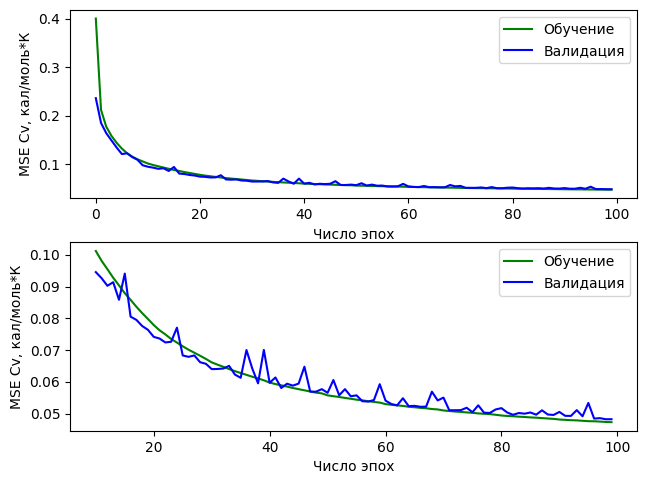